#### Examining the relationshio between a player's pass volume and completion percentage

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [9]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id,season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    
    all_events = []
    
    for match_id in tqdm(match_ids):
        events = requests.get(url=match_url.format(match_id)).json()
        
        passes = [x for x in events if x['type']['name'] == "Pass"]
        for a in passes:
            attributes = {
                "player_id" : a['player']['id'],
                "outcome" : 0 if 'outcome' in a['pass'].keys() else 1
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [5]:
competition_id = 43
season_id = 3

In [10]:
df = parse_data(competition_id,season_id)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:51<00:00,  1.25it/s]


In [11]:
df.head()

,player_id,outcome
0,3043,1
1,3027,0
2,5468,0
3,5527,1
4,3959,0


In [12]:
total_passes = df.groupby('player_id')['outcome'].sum()
percentage = df.groupby('player_id')['outcome'].mean()

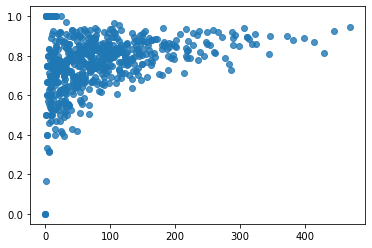

In [13]:
plt.scatter(total_passes, percentage, alpha=0.8)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
fit = model.fit([[x] for x in total_passes], percentage)
print("Coefficients : {}".format(fit.coef_))
print("Intercept : {}".format(fit.intercept_))

Coefficients : [0.00063207]
Intercept : 0.7094185597471281


In [16]:
xfit = [0,500]
yfit = model.predict([[x] for x in xfit])

In [ ]:
plt.